# SIS18 how-to use in PySixTrackLib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Creating the thin lens lattice

In [2]:
!cat madx/sis18.lat

! Element definitions:
! ------------------- horizontal quadrupole ----------------------------
QS1F: QUADRUPOLE, L=1.04, K1=0.282632;
QS2D: QUADRUPOLE, L=1.04, K1=-0.492;
QS3T: QUADRUPOLE, L = 0.4804, K1 = 0.656;
!---------------------  DRIFT SPACES DEFINITION  ---------------------
DR1: DRIFT, L=0.6450000;
DR2: DRIFT, L=0.9700000;
DR3: DRIFT, L=6.8390117;
DR4: DRIFT, L=0.6000000;
DR5: DRIFT, L=0.7098000;
DR6: DRIFT, L=0.4998000;
!--------------------------  BENDING MAGNET ---------------------------
ALPHA  := 15 * 1/57.2958;
LL  := 150 * 1/57.2958;
RB: SBEND, L=2.6175, ANGLE=ALPHA;

! ---------------------------  LINE DEFINITION --------------------------
! Sections without injection devices, steeres and position monitors
CELLA: LINE=(DR1, RB, DR2, RB, DR3, QS1F, DR4, QS2D, DR5, QS3T, DR6);

FODO: LINE = (12*CELLA);


RETURN;


In [3]:
from cpymad.madx import Madx

import pysixtracklib as pyst

In [4]:
madx = Madx()
madx.options.echo = False


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.04.02  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2018.10.03               +
  + Execution date: 2019.05.21 13:18:48      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [5]:
madx.call(file="madx/sis18.lat")

In [6]:
from scipy.constants import e, m_p, c

In [7]:
p0c = 6 * 1e9 # in eV
Etot = np.sqrt(p0c**2 + (m_p/e)**2 * c**4) * 1e-9 # in GeV

In [8]:
Etot

6.072919767202941

In [9]:
madx.command.beam(particle='proton', energy=str(Etot)) # energy in GeV

True

In [10]:
madx.use(sequence="FODO")

In [11]:
madx.twiss();

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
       216.7081404                 -0      0.03859362031        5.090286657 

                q1                dq1            betxmax              dxmax 
       4.577501457       -4.130454489        15.39960299        2.438781128 

             dxrms             xcomax             xcorms                 q2 
        1.87333493                  0                  0        2.718992979 

               dq2            betymax              dymax              dyrms 
      -6.521429582         29.6324848                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

In [12]:
assert madx.command.select(
    flag='MAKETHIN',
    CLASS='QUADRUPOLE',
    SLICE='8',
)

assert madx.command.select(
    flag='MAKETHIN',
    class_='SBEND',
    slice_='8',
)

assert madx.command.select(
    flag='MAKETHIN',
    class_='RBEND',
    slice_='8',
)

In [13]:
madx.command.makethin(
    makedipedge=False,
    style='teapot',
    sequence='FODO',
)

makethin: style chosen : teapot
makethin: slicing sequence : fodo


True

In [14]:
twiss = madx.twiss();

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
       216.7081404                 -0      0.03859362031        5.090286657 

                q1                dq1            betxmax              dxmax 
       4.577501457       -4.130454489        15.39960299        2.438781128 

             dxrms             xcomax             xcorms                 q2 
        1.87333493                  0                  0        2.718992979 

               dq2            betymax              dymax              dyrms 
      -6.521429582         29.6324848                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

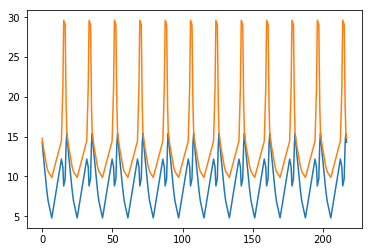

In [15]:
plt.plot(twiss['s'], twiss['betx'])
plt.plot(twiss['s'], twiss['bety'])

In [16]:
madx.command.save(sequence='FODO', file='sis18_thin.seq')

++++++ warning: SAVE makes all previous USE invalid !  


True

In [17]:
!cat sis18_thin.seq

rb..1: multipole,lrad:= 0.3271875,knl:={ 0.03272491177};
rb..2: multipole,lrad:= 0.3271875,knl:={ 0.03272491177};
rb..3: multipole,lrad:= 0.3271875,knl:={ 0.03272491177};
rb..4: multipole,lrad:= 0.3271875,knl:={ 0.03272491177};
rb: marker;
rb..5: multipole,lrad:= 0.3271875,knl:={ 0.03272491177};
rb..6: multipole,lrad:= 0.3271875,knl:={ 0.03272491177};
rb..7: multipole,lrad:= 0.3271875,knl:={ 0.03272491177};
rb..8: multipole,lrad:= 0.3271875,knl:={ 0.03272491177};
qs1f..1: multipole,lrad:= 0.13,knl:={ 0, 0.03674216};
qs1f..2: multipole,lrad:= 0.13,knl:={ 0, 0.03674216};
qs1f..3: multipole,lrad:= 0.13,knl:={ 0, 0.03674216};
qs1f..4: multipole,lrad:= 0.13,knl:={ 0, 0.03674216};
qs1f: marker;
qs1f..5: multipole,lrad:= 0.13,knl:={ 0, 0.03674216};
qs1f..6: multipole,lrad:= 0.13,knl:={ 0, 0.03674216};
qs1f..7: multipole,lrad:= 0.13,knl:={ 0, 0.03674216};
qs1f..8: multipole,lrad:= 0.13,knl:={ 0, 0.03674216};
qs2d..1: multipole,lrad:= 0.13,knl:={ 0, -0.06396};
qs2d..2: multipole,lrad:= 0.13,knl

# Loading thin lens lattice

In [18]:
madx = Madx()
madx.options.echo = False


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.04.02  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2018.10.03               +
  + Execution date: 2019.05.21 13:18:57      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [19]:
madx.call(file="sis18_thin.seq")

In [20]:
madx.command.beam(particle='proton', energy=str(Etot)) # energy in GeV

True

In [21]:
madx.use(sequence="FODO")

In [22]:
madx.twiss();

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
       216.7081404                 -0      0.03859155171         5.09042308 

                q1                dq1            betxmax              dxmax 
       4.577598169       -4.337325087        15.52637808        2.457595991 

             dxrms             xcomax             xcorms                 q2 
       1.851915623                  0                  0        2.718441832 

               dq2            betymax              dymax              dyrms 
       -6.04407507        33.60548239                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

In [23]:
sis18 = madx.sequence.FODO

In [24]:
elements = pyst.Elements.from_mad(sis18)

In [25]:
nturns = 1024
elements = pyst.Elements.from_mad(sis18)
elements.BeamMonitor(num_stores=nturns);

In [26]:
npart = 10
particles = pyst.Particles.from_ref(npart, p0c=p0c)

In [27]:
particles.x += np.linspace(0, 1e-6, npart)

In [28]:
job = pyst.TrackJob(elements, particles)

In [29]:
job.track(nturns)

0

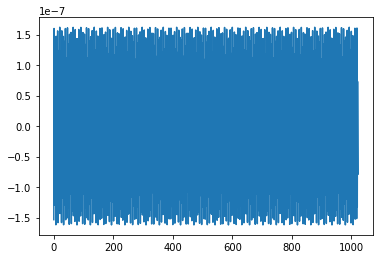

In [30]:
plt.plot(job.output.particles[0].x[1::npart])

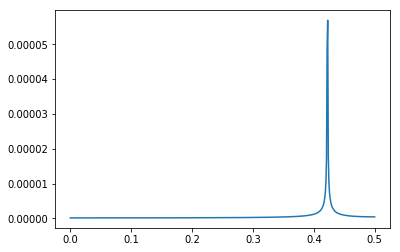

In [31]:
data = job.output.particles[0].x[1::npart]
plt.plot(
    np.fft.rfftfreq(len(data)),
    np.abs(np.fft.rfft(data))
)

# Timing Comparison

On the Dell Latitude 5290 with intel i5-8250U we benchmark:

In [32]:
pyst.TrackJob.enabled_archs()

['opencl', 'cuda', 'cpu']

In [33]:
nturns = 1
elements = pyst.Elements.from_mad(sis18)

def prepare(npart=int(1e6), p0c=p0c, elements=elements, device='cpu'):
    particles = pyst.Particles.from_ref(npart, p0c=p0c)
    particles.x += np.linspace(0, 1e-6, npart)

    job = pyst.TrackJob(elements, particles, device=device)
    return job

In [34]:
import time
class Timer(object):
    def __init__(self):
        self.interval = 0

    def __enter__(self):
        self.t0 = time.time()
        return self
    
    def __exit__(self, *args, **kwargs):
        self.t1 = time.time()
        self.interval = self.t1 - self.t0
        return False

def timeit(device='cpu', nturns=nturns, repeat=10):
    res = 0
    for i in range(repeat):
        job = prepare(device=device)
        with Timer() as t:
            job.track((i + 1) * nturns)
        res = (res * i + t.interval) / (i + 1)

    print ('The job took {:.3f} ms for {} turns (mean of {} loops).'.format(
        res * 1e3, nturns, repeat))

## Single CPU timing

In [56]:
timeit(device='cpu:')

The job took 56923.465 ms for 1 turns (mean of 10 loops).


## OpenCL NVIDIA V100 timing

In [62]:
timeit(device="opencl:")

The job took 141.601 ms for 1 turns (mean of 10 loops).


### OpenCL device info

In [35]:
%%file clDeviceQuery.cpp
/* Copyright 1993-2009 NVIDIA Corporation.  All rights reserved.
   Modified by Mark Zwolinski, December 2009 
   Modified by Robert McGibbon, August 2013
*/
#ifdef __APPLE__
#include <OpenCL/opencl.h>
#else
#include <CL/cl.h>
#endif
#include <stdlib.h>
#include <stdio.h>
#include <string.h>

#include <sstream>
#include <fstream>

void clPrintDevInfo(cl_device_id device) {
  char device_string[1024];

  // CL_DEVICE_NAME
  clGetDeviceInfo(device, CL_DEVICE_NAME, sizeof(device_string), &device_string, NULL);
  printf("  CL_DEVICE_NAME: \t\t\t%s\n", device_string);

  // CL_DEVICE_VENDOR
  clGetDeviceInfo(device, CL_DEVICE_VENDOR, sizeof(device_string), &device_string, NULL);
  printf("  CL_DEVICE_VENDOR: \t\t\t%s\n", device_string);

  // CL_DRIVER_VERSION
  clGetDeviceInfo(device, CL_DRIVER_VERSION, sizeof(device_string), &device_string, NULL);
  printf("  CL_DRIVER_VERSION: \t\t\t%s\n", device_string);

  // CL_DEVICE_INFO
  cl_device_type type;
  clGetDeviceInfo(device, CL_DEVICE_TYPE, sizeof(type), &type, NULL);
  if( type & CL_DEVICE_TYPE_CPU )
    printf("  CL_DEVICE_TYPE:\t\t\t%s\n", "CL_DEVICE_TYPE_CPU");
  if( type & CL_DEVICE_TYPE_GPU )
    printf("  CL_DEVICE_TYPE:\t\t\t%s\n", "CL_DEVICE_TYPE_GPU");
  if( type & CL_DEVICE_TYPE_ACCELERATOR )
    printf("  CL_DEVICE_TYPE:\t\t\t%s\n", "CL_DEVICE_TYPE_ACCELERATOR");
  if( type & CL_DEVICE_TYPE_DEFAULT )
    printf("  CL_DEVICE_TYPE:\t\t\t%s\n", "CL_DEVICE_TYPE_DEFAULT");

  // CL_DEVICE_MAX_COMPUTE_UNITS
  cl_uint compute_units;
  clGetDeviceInfo(device, CL_DEVICE_MAX_COMPUTE_UNITS, sizeof(compute_units), &compute_units, NULL);
  printf("  CL_DEVICE_MAX_COMPUTE_UNITS:\t\t%u\n", compute_units);

  // CL_DEVICE_MAX_WORK_ITEM_DIMENSIONS
  size_t workitem_dims;
  clGetDeviceInfo(device, CL_DEVICE_MAX_WORK_ITEM_DIMENSIONS, sizeof(workitem_dims), &workitem_dims, NULL);
  printf("  CL_DEVICE_MAX_WORK_ITEM_DIMENSIONS:\t%u\n", workitem_dims);

  // CL_DEVICE_MAX_WORK_ITEM_SIZES
  size_t workitem_size[3];
  clGetDeviceInfo(device, CL_DEVICE_MAX_WORK_ITEM_SIZES, sizeof(workitem_size), &workitem_size, NULL);
  printf("  CL_DEVICE_MAX_WORK_ITEM_SIZES:\t%u / %u / %u \n", workitem_size[0], workitem_size[1], workitem_size[2]);

  // CL_DEVICE_MAX_WORK_GROUP_SIZE
  size_t workgroup_size;
  clGetDeviceInfo(device, CL_DEVICE_MAX_WORK_GROUP_SIZE, sizeof(workgroup_size), &workgroup_size, NULL);
  printf("  CL_DEVICE_MAX_WORK_GROUP_SIZE:\t%u\n", workgroup_size);

  // CL_DEVICE_MAX_CLOCK_FREQUENCY
  cl_uint clock_frequency;
  clGetDeviceInfo(device, CL_DEVICE_MAX_CLOCK_FREQUENCY, sizeof(clock_frequency), &clock_frequency, NULL);
  printf("  CL_DEVICE_MAX_CLOCK_FREQUENCY:\t%u MHz\n", clock_frequency);

  // CL_DEVICE_ADDRESS_BITS
  cl_uint addr_bits;
  clGetDeviceInfo(device, CL_DEVICE_ADDRESS_BITS, sizeof(addr_bits), &addr_bits, NULL);
  printf("  CL_DEVICE_ADDRESS_BITS:\t\t%u\n", addr_bits);

  // CL_DEVICE_MAX_MEM_ALLOC_SIZE
  cl_ulong max_mem_alloc_size;
  clGetDeviceInfo(device, CL_DEVICE_MAX_MEM_ALLOC_SIZE, sizeof(max_mem_alloc_size), &max_mem_alloc_size, NULL);
  printf("  CL_DEVICE_MAX_MEM_ALLOC_SIZE:\t\t%u MByte\n", (unsigned int)(max_mem_alloc_size / (1024 * 1024)));

  // CL_DEVICE_GLOBAL_MEM_SIZE
  cl_ulong mem_size;
  clGetDeviceInfo(device, CL_DEVICE_GLOBAL_MEM_SIZE, sizeof(mem_size), &mem_size, NULL);
  printf("  CL_DEVICE_GLOBAL_MEM_SIZE:\t\t%u MByte\n", (unsigned int)(mem_size / (1024 * 1024)));

  // CL_DEVICE_ERROR_CORRECTION_SUPPORT
  cl_bool error_correction_support;
  clGetDeviceInfo(device, CL_DEVICE_ERROR_CORRECTION_SUPPORT, sizeof(error_correction_support), &error_correction_support, NULL);
  printf("  CL_DEVICE_ERROR_CORRECTION_SUPPORT:\t%s\n", error_correction_support == CL_TRUE ? "yes" : "no");

  // CL_DEVICE_LOCAL_MEM_TYPE
  cl_device_local_mem_type local_mem_type;
  clGetDeviceInfo(device, CL_DEVICE_LOCAL_MEM_TYPE, sizeof(local_mem_type), &local_mem_type, NULL);
  printf("  CL_DEVICE_LOCAL_MEM_TYPE:\t\t%s\n", local_mem_type == 1 ? "local" : "global");

  // CL_DEVICE_LOCAL_MEM_SIZE
  clGetDeviceInfo(device, CL_DEVICE_LOCAL_MEM_SIZE, sizeof(mem_size), &mem_size, NULL);
  printf("  CL_DEVICE_LOCAL_MEM_SIZE:\t\t%u KByte\n", (unsigned int)(mem_size / 1024));

  // CL_DEVICE_MAX_CONSTANT_BUFFER_SIZE
  clGetDeviceInfo(device, CL_DEVICE_MAX_CONSTANT_BUFFER_SIZE, sizeof(mem_size), &mem_size, NULL);
  printf("  CL_DEVICE_MAX_CONSTANT_BUFFER_SIZE:\t%u KByte\n", (unsigned int)(mem_size / 1024));

  // CL_DEVICE_QUEUE_PROPERTIES
  cl_command_queue_properties queue_properties;
  clGetDeviceInfo(device, CL_DEVICE_QUEUE_PROPERTIES, sizeof(queue_properties), &queue_properties, NULL);
  if( queue_properties & CL_QUEUE_OUT_OF_ORDER_EXEC_MODE_ENABLE )
    printf("  CL_DEVICE_QUEUE_PROPERTIES:\t\t%s\n", "CL_QUEUE_OUT_OF_ORDER_EXEC_MODE_ENABLE");
  if( queue_properties & CL_QUEUE_PROFILING_ENABLE )
    printf("  CL_DEVICE_QUEUE_PROPERTIES:\t\t%s\n", "CL_QUEUE_PROFILING_ENABLE");

  // CL_DEVICE_IMAGE_SUPPORT
  cl_bool image_support;
  clGetDeviceInfo(device, CL_DEVICE_IMAGE_SUPPORT, sizeof(image_support), &image_support, NULL);
  printf("  CL_DEVICE_IMAGE_SUPPORT:\t\t%u\n", image_support);

  // CL_DEVICE_MAX_READ_IMAGE_ARGS
  cl_uint max_read_image_args;
  clGetDeviceInfo(device, CL_DEVICE_MAX_READ_IMAGE_ARGS, sizeof(max_read_image_args), &max_read_image_args, NULL);
  printf("  CL_DEVICE_MAX_READ_IMAGE_ARGS:\t%u\n", max_read_image_args);

  // CL_DEVICE_MAX_WRITE_IMAGE_ARGS
  cl_uint max_write_image_args;
  clGetDeviceInfo(device, CL_DEVICE_MAX_WRITE_IMAGE_ARGS, sizeof(max_write_image_args), &max_write_image_args, NULL);
  printf("  CL_DEVICE_MAX_WRITE_IMAGE_ARGS:\t%u\n", max_write_image_args);

  // CL_DEVICE_IMAGE2D_MAX_WIDTH, CL_DEVICE_IMAGE2D_MAX_HEIGHT, CL_DEVICE_IMAGE3D_MAX_WIDTH, CL_DEVICE_IMAGE3D_MAX_HEIGHT, CL_DEVICE_IMAGE3D_MAX_DEPTH
  size_t szMaxDims[5];
  printf("\n  CL_DEVICE_IMAGE <dim>");
  clGetDeviceInfo(device, CL_DEVICE_IMAGE2D_MAX_WIDTH, sizeof(size_t), &szMaxDims[0], NULL);
  printf("\t\t\t2D_MAX_WIDTH\t %u\n", szMaxDims[0]);
  clGetDeviceInfo(device, CL_DEVICE_IMAGE2D_MAX_HEIGHT, sizeof(size_t), &szMaxDims[1], NULL);
  printf("\t\t\t\t\t2D_MAX_HEIGHT\t %u\n", szMaxDims[1]);
  clGetDeviceInfo(device, CL_DEVICE_IMAGE3D_MAX_WIDTH, sizeof(size_t), &szMaxDims[2], NULL);
  printf("\t\t\t\t\t3D_MAX_WIDTH\t %u\n", szMaxDims[2]);
  clGetDeviceInfo(device, CL_DEVICE_IMAGE3D_MAX_HEIGHT, sizeof(size_t), &szMaxDims[3], NULL);
  printf("\t\t\t\t\t3D_MAX_HEIGHT\t %u\n", szMaxDims[3]);
  clGetDeviceInfo(device, CL_DEVICE_IMAGE3D_MAX_DEPTH, sizeof(size_t), &szMaxDims[4], NULL);
  printf("\t\t\t\t\t3D_MAX_DEPTH\t %u\n", szMaxDims[4]);

  // CL_DEVICE_PREFERRED_VECTOR_WIDTH_<type>
  printf("  CL_DEVICE_PREFERRED_VECTOR_WIDTH_<t>\t");
  cl_uint vec_width [6];
  clGetDeviceInfo(device, CL_DEVICE_PREFERRED_VECTOR_WIDTH_CHAR, sizeof(cl_uint), &vec_width[0], NULL);
  clGetDeviceInfo(device, CL_DEVICE_PREFERRED_VECTOR_WIDTH_SHORT, sizeof(cl_uint), &vec_width[1], NULL);
  clGetDeviceInfo(device, CL_DEVICE_PREFERRED_VECTOR_WIDTH_INT, sizeof(cl_uint), &vec_width[2], NULL);
  clGetDeviceInfo(device, CL_DEVICE_PREFERRED_VECTOR_WIDTH_LONG, sizeof(cl_uint), &vec_width[3], NULL);
  clGetDeviceInfo(device, CL_DEVICE_PREFERRED_VECTOR_WIDTH_FLOAT, sizeof(cl_uint), &vec_width[4], NULL);
  clGetDeviceInfo(device, CL_DEVICE_PREFERRED_VECTOR_WIDTH_DOUBLE, sizeof(cl_uint), &vec_width[5], NULL);
  printf("CHAR %u, SHORT %u, INT %u, FLOAT %u, DOUBLE %u\n\n\n",
   vec_width[0], vec_width[1], vec_width[2], vec_width[3], vec_width[4]);
}


int main(int argc, const char** argv) {
  // start logs
  printf("clDeviceQuery Starting...\n\n");
  bool bPassed = true;
  std::string sProfileString = "clDeviceQuery, Platform Name = ";

  // Get OpenCL platform ID for NVIDIA if avaiable, otherwise default
  char cBuffer[1024];
  cl_platform_id clSelectedPlatformID = NULL;
  cl_platform_id* clPlatformIDs;

  cl_uint num_platforms;
  cl_int ciErrNum = clGetPlatformIDs(0, NULL, &num_platforms);
  if (ciErrNum != CL_SUCCESS) {
    printf(" Error %i in clGetPlatformIDs Call!\n\n", ciErrNum);
    bPassed = false;
  } else {
    if (num_platforms == 0) {
      printf("No OpenCL platform found!\n\n");
      bPassed = false;
    } else {
      // if there's one platform or more, make space for ID's
      if ((clPlatformIDs = (cl_platform_id*)malloc(num_platforms * sizeof(cl_platform_id))) == NULL) {
	printf("Failed to allocate memory for cl_platform ID's!\n\n");
	bPassed = false;
      }

      printf("%d OpenCL Platforms found\n\n", num_platforms);
      // get platform info for each platform
      ciErrNum = clGetPlatformIDs (num_platforms, clPlatformIDs, NULL);
      for(cl_uint i = 0; i < num_platforms; ++i) {
	ciErrNum = clGetPlatformInfo (clPlatformIDs[i], CL_PLATFORM_NAME, 1024, &cBuffer, NULL);
	if(ciErrNum == CL_SUCCESS) {
	  clSelectedPlatformID = clPlatformIDs[i];
	  // Get OpenCL platform name and version
	  ciErrNum = clGetPlatformInfo (clSelectedPlatformID, CL_PLATFORM_NAME, sizeof(cBuffer), cBuffer, NULL);
	  if (ciErrNum == CL_SUCCESS) {
	    printf(" CL_PLATFORM_NAME: \t%s\n", cBuffer);
	    sProfileString += cBuffer;
	  } else {
	    printf(" Error %i in clGetPlatformInfo Call !!!\n\n", ciErrNum);
    bPassed = false;
  }
  sProfileString += ", Platform Version = ";

  ciErrNum = clGetPlatformInfo (clSelectedPlatformID, CL_PLATFORM_VERSION, sizeof(cBuffer), cBuffer, NULL);
  if (ciErrNum == CL_SUCCESS) {
    printf(" CL_PLATFORM_VERSION: \t%s\n", cBuffer);
    sProfileString += cBuffer;
  } else {
    printf(" Error %i in clGetPlatformInfo Call !!!\n\n", ciErrNum);
    bPassed = false;
  }

  // Log OpenCL SDK Version # (for convenience:  not specific to OpenCL)
  sProfileString += ", NumDevs = ";

  // Get and log OpenCL device info
  cl_uint ciDeviceCount;
  cl_device_id *devices;
  printf("OpenCL Device Info:\n\n");
  ciErrNum = clGetDeviceIDs (clSelectedPlatformID, CL_DEVICE_TYPE_ALL, 0, NULL, &ciDeviceCount);

  // check for 0 devices found or errors...
  if (ciDeviceCount == 0) {
    printf(" No devices found supporting OpenCL (return code %i)\n\n", ciErrNum);
    bPassed = false;
    sProfileString += "0";
  } else if (ciErrNum != CL_SUCCESS) {
    printf(" Error %i in clGetDeviceIDs call !!!\n\n", ciErrNum);
    bPassed = false;
  } else {
    // Get and log the OpenCL device ID's
    ciErrNum = clGetPlatformInfo (clSelectedPlatformID, CL_PLATFORM_NAME, sizeof(cBuffer), cBuffer, NULL);
    printf(" %u devices found supporting OpenCL on: %s\n\n", ciDeviceCount, cBuffer);
    char cTemp[2];
    sprintf(cTemp, "%u", ciDeviceCount);
    sProfileString += cTemp;
    if ((devices = (cl_device_id*)malloc(sizeof(cl_device_id) * ciDeviceCount)) == NULL) {
      printf(" Failed to allocate memory for devices !!!\n\n");
      bPassed = false;
    }
    ciErrNum = clGetDeviceIDs (clSelectedPlatformID, CL_DEVICE_TYPE_ALL, ciDeviceCount, devices, &ciDeviceCount);
    if (ciErrNum == CL_SUCCESS) {
      for(unsigned int i = 0; i < ciDeviceCount; ++i )  {
        printf(" ----------------------------------\n");
clGetDeviceInfo(devices[i], CL_DEVICE_NAME, sizeof(cBuffer), &cBuffer, NULL);
printf(" Device %s\n", cBuffer);
printf(" ---------------------------------\n");
clPrintDevInfo(devices[i]);
sProfileString += ", Device = ";
sProfileString += cBuffer;
      }
            } else {
      printf(" Error %i in clGetDeviceIDs call !!!\n\n", ciErrNum);
      bPassed = false;
    }
  }

  // masterlog info
  sProfileString += "\n";
  printf("%s", sProfileString.c_str());
}
free(clPlatformIDs);
      }
    }
  }

  // Log system info(for convenience:  not specific to OpenCL)
  printf( "\nSystem Info: \n\n");
  char timestr[255];
  time_t now = time(NULL);
  struct tm  *ts;

  ts = localtime(&now);

  strftime(timestr, 255, " %H:%M:%S, %m/%d/%Y",ts);

  // write time and date to logs
  printf(" Local Time/Date = %s\n", timestr);
  // write proc and OS info to logs
  // parse /proc/cpuinfo
  std::ifstream cpuinfo( "/proc/cpuinfo" ); // open the file in /proc
  std::string tmp;

  int cpu_num = 0;
  std::string cpu_name = "none";
  do {
    cpuinfo >> tmp;

    if( tmp == "processor" )
      cpu_num++;

    if( tmp == "name" ) {
      cpuinfo >> tmp; // skip :

      std::stringstream tmp_stream("");
      do {
	cpuinfo >> tmp;
	if (tmp != std::string("stepping")) {
	  tmp_stream << tmp.c_str() << " ";
	}

      }
      while (tmp != std::string("stepping"));

      cpu_name = tmp_stream.str();
    }
  }
  while ( (! cpuinfo.eof()) );

  // Linux version
  std::ifstream version( "/proc/version" );
  char versionstr[255];

  version.getline(versionstr, 255);

  printf(" CPU Name: %s\n # of CPU processors: %u\n %s\n\n\n",
	 cpu_name.c_str(),cpu_num,versionstr);

  // finish
  printf("TEST %s\n\n", bPassed ? "PASSED" : "FAILED !!!");
}

Overwriting clDeviceQuery.cpp


In [36]:
!g++ -o clDeviceQuery -I/usr/include clDeviceQuery.cpp -lOpenCL

clDeviceQuery.cpp: In function ‘void clPrintDevInfo(cl_device_id)’:
clDeviceQuery.cpp:52:70: warning: format ‘%u’ expects argument of type ‘unsigned int’, but argument 2 has type ‘size_t {aka long unsigned int}’ [-Wformat=]
   printf("  CL_DEVICE_MAX_WORK_ITEM_DIMENSIONS:\t%u\n", workitem_dims);
                                                                      ^
clDeviceQuery.cpp:57:115: warning: format ‘%u’ expects argument of type ‘unsigned int’, but argument 2 has type ‘size_t {aka long unsigned int}’ [-Wformat=]
 IZES:\t%u / %u / %u \n", workitem_size[0], workitem_size[1], workitem_size[2]);
                          ~~~~~~~~~~~~~~~~                                    ^
clDeviceQuery.cpp:57:115: warning: format ‘%u’ expects argument of type ‘unsigned int’, but argument 3 has type ‘size_t {aka long unsigned int}’ [-Wformat=]
clDeviceQuery.cpp:57:115: warning: format ‘%u’ expects argument of type ‘unsigned int’, but argument 4 has type ‘size_t {aka long unsigned int}’ [-Wformat=]

In [61]:
!./clDeviceQuery 

clDeviceQuery Starting...

1 OpenCL Platforms found

 CL_PLATFORM_NAME: 	NVIDIA CUDA
 CL_PLATFORM_VERSION: 	OpenCL 1.2 CUDA 10.0.211
OpenCL Device Info:

 4 devices found supporting OpenCL on: NVIDIA CUDA

 ----------------------------------
 Device Tesla V100-PCIE-16GB
 ---------------------------------
  CL_DEVICE_NAME: 			Tesla V100-PCIE-16GB
  CL_DEVICE_VENDOR: 			NVIDIA Corporation
  CL_DRIVER_VERSION: 			410.79
  CL_DEVICE_TYPE:			CL_DEVICE_TYPE_GPU
  CL_DEVICE_MAX_COMPUTE_UNITS:		80
  CL_DEVICE_MAX_WORK_ITEM_DIMENSIONS:	3
  CL_DEVICE_MAX_WORK_ITEM_SIZES:	1024 / 1024 / 64 
  CL_DEVICE_MAX_WORK_GROUP_SIZE:	1024
  CL_DEVICE_MAX_CLOCK_FREQUENCY:	1380 MHz
  CL_DEVICE_ADDRESS_BITS:		64
  CL_DEVICE_MAX_MEM_ALLOC_SIZE:		4032 MByte
  CL_DEVICE_GLOBAL_MEM_SIZE:		16130 MByte
  CL_DEVICE_ERROR_CORRECTION_SUPPORT:	yes
  CL_DEVICE_LOCAL_MEM_TYPE:		local
  CL_DEVICE_LOCAL_MEM_SIZE:		48 KByte
  CL_DEVICE_MAX_CONSTANT_BUFFER_SIZE:	64 KByte
  CL_DEVICE_QUEUE_PROPERTIES:		CL_QUEUE_OUT_OF_ORDER_EXE

# TIMING on Martin's pcbe16820

In [35]:
!./clDeviceQuery 

clDeviceQuery Starting...

3 OpenCL Platforms found

 CL_PLATFORM_NAME: 	AMD Accelerated Parallel Processing
 CL_PLATFORM_VERSION: 	OpenCL 2.1 AMD-APP (2633.3)
OpenCL Device Info:

 1 devices found supporting OpenCL on: AMD Accelerated Parallel Processing

 ----------------------------------
 Device Baffin
 ---------------------------------
  CL_DEVICE_NAME: 			Baffin
  CL_DEVICE_VENDOR: 			Advanced Micro Devices, Inc.
  CL_DRIVER_VERSION: 			2633.3
  CL_DEVICE_TYPE:			CL_DEVICE_TYPE_GPU
  CL_DEVICE_MAX_COMPUTE_UNITS:		16
  CL_DEVICE_MAX_WORK_ITEM_DIMENSIONS:	3
  CL_DEVICE_MAX_WORK_ITEM_SIZES:	1024 / 1024 / 1024 
  CL_DEVICE_MAX_WORK_GROUP_SIZE:	256
  CL_DEVICE_MAX_CLOCK_FREQUENCY:	1196 MHz
  CL_DEVICE_ADDRESS_BITS:		64
  CL_DEVICE_MAX_MEM_ALLOC_SIZE:		2914 MByte
  CL_DEVICE_GLOBAL_MEM_SIZE:		3657 MByte
  CL_DEVICE_ERROR_CORRECTION_SUPPORT:	no
  CL_DEVICE_LOCAL_MEM_TYPE:		local
  CL_DEVICE_LOCAL_MEM_SIZE:		32 KByte
  CL_DEVICE_MAX_CONSTANT_BUFFER_SIZE:	2984186 KByte
  CL_DEVICE_QUEUE_P

## GPU timing: GeForce GTX 1050 Ti

In [36]:
timeit(device='opencl:1.0')

The job took 4639.757 ms for 1 turns (mean of 10 loops).


## GPU timing: AMD Radeon RX 560 Series

In [39]:
timeit(device='opencl:0.0')

The job took 3153.188 ms for 1 turns (mean of 10 loops).


## Single CPU timing

In [38]:
timeit(device='cpu:')

The job took 54514.682 ms for 1 turns (mean of 10 loops).


## OpenCL 8-core CPU timing

In [35]:
timeit(device="opencl:2.0")

The job took 6128.564 ms for 1 turns (mean of 10 loops).


In [34]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 1
model name	: AMD Ryzen 7 1700X Eight-Core Processor
stepping	: 1
microcode	: 0x8001136
cpu MHz		: 2798.286
cache size	: 512 KB
physical id	: 0
siblings	: 16
core id		: 0
cpu cores	: 8
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid aperfmperf pni pclmulqdq monitor ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand lahf_lm cmp_legacy svm extapic cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw skinit wdt tce topoext perfctr_core perfctr_nb bpext perfctr_llc mwaitx cpb hw_pstate sme ssbd ibpb vmmcall fsgsbase bmi1 avx2 smep bmi2 rdseed adx smap clflushopt sha_ni xsaveopt xsavec xgetbv1 xsaves clzero irperf xsaveerptr arat npt lbrv svm_lock nrip_save tsc_s